In [57]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
#import pygame

def create_database(x,y,p):   #x ist die Höhe der Fläche, y die Länge und p die Wahrscheinlichkeit, dass eine Zelle ein Baum ist 
    return np.random.choice([0,1],size=(x,y),p=[1-p,p])

p=np.random.randint(0,101)/100

data = create_database(5,10,p)
data




array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

0

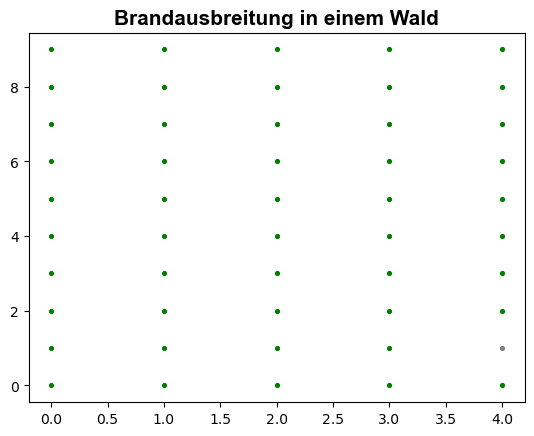

In [62]:


def waldanzeige(x,y,wald):
    x1,y1 = np.where(wald==1)# Baum x 
    x2,y2 = np.where(wald==0) # Leer x
    x3,y3 = np.where(wald==2) # Feuer x  
    plt.title("Brandausbreitung in einem Wald",fontweight="bold",fontname="Arial",fontsize="15")
    plt.scatter(x1,y1,c='green',marker='.',s=30) # Baum
    plt.scatter(x2,y2,c='grey',marker='.',s=30)#Leer
    plt.scatter(x3,y3,c='red',marker='.',s=30)#Feuer
    return 0

#data[5][5]=1

waldanzeige(100,100,data)




In [32]:
def init_feuerausbreitung(wald): 
    if(len(np.unique(wald))==2):
        x,y=np.where(wald==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        wald[i_x][i_y]=2
    elif(np.unique(wald)==[1]).any():
        x,y=np.where(wald==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        wald[i_x][i_y]=2        
    return wald

init_feuerausbreitung(data)



array([[0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [2, 0, 1, 1, 1]])

In [58]:
def feuerausbreitung(wald,proba): #wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
    proba=proba*100
    prop_abr_brul=[]
    if(len(np.where(wald==2)[0])==0):
        init_feuerausbreitung(wald)
    x,y = np.where(wald==2)
    zh_baum_inital = len(np.where(wald==1)[0])
    for i in range(len(x)):
        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0):
            print("len(wald[0]) = ",len(wald[0]),"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0
            zh_baum = len(np.where(wald==1)[0])
            prop=zh_baum/zh_baum_inital
            prop_abr_brul.append(prop)
        else:
            wald[x[i]][y[i]]=0
            
    if(len(np.where(wald==2)[0])==0):
        #zh_baum = len(np.where(wald==3)[0])+len(np.where(wald==1)[0])
        zh_baum = len(np.where(wald==1)[0])
        print("Anzhl der Baum = ",zh_baum,"\n Anteil des verbrannten Baumes als Funktion der Zeit: ",prop_abr_brul)
        #zh_baum_brenn = len(np.where(wald==3)[0])
        #print("Total Anzhl der Baum : ",zh_baum,"\nZhle Baum brenn : ",zh_baum_brenn,"\n Proportion zh_baum_brule/zh_baum : ",(zh_baum_brenn/zh_baum)*100,"%")
        return 0

feuerausbreitung(data,0.2)

Anzhl der Baum =  49 
 Anteil des verbrannten Baumes als Funktion der Zeit:  []


0

In [97]:
def start(x,y,p):
    wald = create_database(x,y,p)
    print("Baumprozentsatz : ",p*100,"%")
    while feuerausbreitung(wald,proba=0.8)!=0:
        
        init_feuerausbreitung(wald)
        waldanzeige(x,y,wald)
        plt.pause(2)
        display.clear_output(wait=True)
    #print("Baumprozentsatz : ",p*100,"%")
    return waldanzeige(x,y,wald)

start(20,30,0.8)

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 

len(wald[0]) =  30 



KeyboardInterrupt: 

In [108]:
def feuerausbreitung2(wald,proba): #wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
    proba=proba*100
    prop_abr_brul=[]
    if(len(np.where(wald==2)[0])==0):
        init_feuerausbreitung(wald)
    x,y = np.where(wald==2)
    zh_baum_inital = len(np.where(wald==1)[0])
    for i in range(len(x)):
        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #interieur
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]==len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #droite
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba: #Recht
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]>0) and (y[i] > 0): #haut
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba: #Hoch
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]==0) and (y[i] > 0): #gauche
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] == 0): #bas
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0

            zh_baum = len(np.where(wald==1)[0])
            prop=zh_baum/zh_baum_inital
            prop_abr_brul.append(prop)
        else:
            wald[x[i]][y[i]]=0
            
    if(len(np.where(wald==2)[0])==0):
        #zh_baum = len(np.where(wald==3)[0])+len(np.where(wald==1)[0])
        zh_baum = len(np.where(wald==1)[0])
        print("Anzhl der Baum = ",zh_baum,"\n Anteil des verbrannten Baumes als Funktion der Zeit: ",prop_abr_brul)
        #zh_baum_brenn = len(np.where(wald==3)[0])
        #print("Total Anzhl der Baum : ",zh_baum,"\nZhle Baum brenn : ",zh_baum_brenn,"\n Proportion zh_baum_brule/zh_baum : ",(zh_baum_brenn/zh_baum)*100,"%")
        return 0

Anzhl der Baum =  60 
 Anteil des verbrannten Baumes als Funktion der Zeit:  []


0

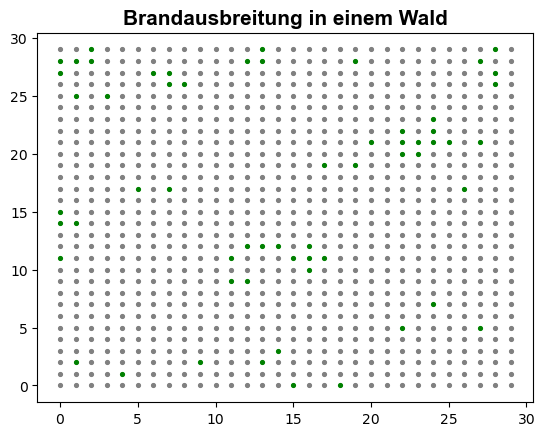

In [111]:
def start2(x,y,p):
    wald = create_database(x,y,p)
    print("lx=",len(wald),"ly=",len(wald[0]))
    print("Baumprozentsatz : ",p*100,"%")
    while feuerausbreitung2(wald,proba=0.8)!=0:
        #print("l0=",x[0],"lx=",len(wald),"ly=",len(wald[0]),"l0=",y[0])
        init_feuerausbreitung(wald)
        waldanzeige(x,y,wald)
        plt.pause(0.5)
        display.clear_output(wait=True)
    #print("Baumprozentsatz : ",p*100,"%")
    #init_feuerausbreitung(wald)
    #waldanzeige(x,y,wald)
    #wald[0][14]=2
    
    
    return waldanzeige(x,y,wald)

start2(30,30,0.7)



In [ ]:
def draw(screen,data):
    x=0
    y=0
    unit=500/len(data)
    for i in range(len(data)):
        for j in range(len(data[0])):
            if(data[i][j]==1):
                pygame.draw.rect(screen,(71, 252, 80), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==0):
                pygame.draw.rect(screen,(247, 213, 143), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit  
            if(data[i][j]==2):
                pygame.draw.rect(screen,(255, 64, 67), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==3):
                pygame.draw.rect(screen,(33, 13, 4), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
        y+=unit
        x=0

    pygame.display.flip()


In [ ]:
pygame.init()

screen = pygame.display.set_mode((500, 500))
screen.fill("white")
pygame.display.set_caption("Propagation d'un feu de forêt")

data = create_database(50,50,0.8)
proba=np.random.choice(np.array([0.2,0.5,0.8]))

while feuerausbreitung(data, proba)!=0:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
           pygame.quit()
    init_feuerausbreitung(data)
    draw(screen,data)
    plt.pause(0.1)
    display.clear_output(wait=True)

pygame.quit()
